In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance

from math import log
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

## Model Functions ##

In [2]:
def model_predictions(model, x_train, x_test, y_train, y_test):
    '''Enter model name and test/train sets to generate predictions, precision, recall, accuracy, and F1 score'''
    model.fit(x_train, y_train)
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    print('Training Precision: ', precision_score(y_train, y_hat_train))
    print('Testing Precision: ', precision_score(y_test, y_hat_test))
    print('-----')

    print('Training Recall: ', recall_score(y_train, y_hat_train))
    print('Testing Recall: ', recall_score(y_test, y_hat_test))
    print('-----')

    print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
    print('-----')

    print('Training F1-Score: ', f1_score(y_train, y_hat_train))
    print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

In [3]:
def confusion_matrix(model, x_test, y_test):
    '''Plot confusion matrix with test set'''
    plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.cool)
    plt.show()

In [4]:
def plot_roc(model, x_train, x_test, y_train, y_test):
    '''Plot ROC for test set and train set with decision_function'''
    y_test_score = model.decision_function(x_test)
    y_train_score = model.decision_function(x_train)

    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score)

    plt.figure(figsize = (6, 6))
    plt.plot(train_fpr, train_tpr, color = 'purple', label = 'Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'red', label = 'Test ROC curve')
    plt.plot([0,1], [0,1], color = 'black', linestyle ='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xticks(rotation = 90)
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

In [5]:
def plot_roc_proba(model, X_train, X_test, y_train, y_test):
    '''Plot ROC for test set and train set with predict_proba'''
    y_test_score = model.predict_proba(X_test_scaled)
    y_train_score = model.predict_proba(X_train_scaled)

    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score[:,1])
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score[:,1])

    plt.figure(figsize = (6, 6))
    plt.plot(train_fpr, train_tpr, color = 'purple', label = 'Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'red', label = 'Test ROC curve')
    plt.plot([0,1], [0,1], color = 'black', linestyle ='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xticks(rotation = 90)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

In [6]:
def plot_roc_pp(model, X_train, X_test, y_train, y_test):

    """
    Input: Model, Train and Test data.
    Output: Train and Test AUC, Roc Curve for Train and Test sets.
    This function works for classification models with predict_proba attribute.
    """
    y_train_score = model.predict_proba(X_train)
    y_test_score = model.predict_proba(X_test)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score [:,1])
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score [:,1])
    
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('------------------------------------')
    
    plt.figure(figsize=(10, 8))
    lw = 2
    
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='red',
             lw=lw, label='Test ROC curve')
    
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [7]:
def model_control_pp(model, X_train, X_test, y_train, y_test):

    """
    This function includes all the functions we created above.
    Roc Curve has predict_proba attribute.
    """
    
    model.fit(X_train, y_train)
    print('Train Score:', model.score(X_train, y_train))
    print('Test Score:', model.score(X_test, y_test))
    print('------------------------------------')
    
    model_predictions(model, X_train, X_test, y_train, y_test)
    confusion_matrix(model, X_test, y_test)
    plot_roc_pp(model, X_train, X_test, y_train, y_test)

In [8]:
df = pd.read_csv('customer_churn_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
pd.set_option('display.max_columns', None)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Exploring Data**

In [10]:
# calculate total charge
df['total charge'] = (df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge'])
df['total mins'] = (df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes'])
df['total calls'] = (df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls'])

**Initial Thoughts**

From what we can see above there seems to be three types of data stored in the columns - ordinal, nominal, numerical. Below is a list of which each column falls into.

Numerical (14) - "number vmail messages", "total day minutes", "total day calls", "total day charge", "total even minutes", "total eve calls", "total eve charge", "total night minutes", "total night calls", "total night charge", "total night minutes", "total intl calls", "total intl charge", "customer service calls", "account length"

Ordinal (3) - "international plan", "voice mail plan", "churn"

Nominal (3) - "state", "phone number", "area code"

All columns will need the standard scaler applied to them, ordinal variables may need to be OHE or simply replaced inplace with 0 or 1. Pending analysis to suggest otherwise area code and phone number seem like they can be dropped. It is possible however that a given state or area code could have a high correlation with churn - our target. 

In [11]:
df.replace('no', 0, inplace=True)
df.replace('yes', 1, inplace=True)
df.replace(False, 0, inplace=True)
df.replace(True, 1, inplace=True)

In [12]:
df.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charge,total mins,total calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,59.449754,591.864776,305.137114
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,10.502261,89.954251,34.448164
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,22.930000,284.300000,191.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,52.380000,531.500000,282.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,59.470000,593.600000,305.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,66.480000,652.400000,328.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,96.150000,885.000000,416.000000


In [13]:
#get value counts for every column
for col in df.columns:
    print('Column Name:', col,'\n')
    print(df[col].value_counts())
    print('---------------------------------------------')
    print('\n')

Column Name: state 

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
ID     73
MI     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     68
WA     66
CO     66
NV     66
RI     65
MA     65
MS     65
AZ     64
MO     63
FL     63
ND     62
ME     62
NM     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
---------------------------------------------


Column Name: account length 

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account length, Length: 212, dtype: int64
---------------------------------------------


Column Name: area code 

415    1655
510     840
408     838
Name: area code, dtype: int64
---------------------------------------------


Column Name: phone n

States in the format that they are in currently does not seem very useful. We probably want to group states by region and see if there are regional influences on churn. 

There is no official demarcation of US states by region, however, we choose [this](https://www.ducksters.com/geography/us_states/us_geographical_regions.php) split for regions.

After mapping the regions into numerical categories we OneHotEncode them. 

In [14]:
df['region'] = df['state'].map({'CA': 0, 'NV': 0, 'UT': 0, 'CO': 0, 'WY': 0, 'ID' : 0, 'MT' : 0, 'OR' : 0, 'WA' : 0, 'AK' : 0, 'HI' : 0, 'AZ' : 1, 'NM' : 1, 'OK' : 1, 'TX' : 1, 'ND': 2, 'SD' : 2, 'KS' : 2, 'NE' : 2, 'MO' : 2, 'IA' : 2, 'MN' : 2, 'WI' : 2,'IL' : 2,'IN' : 2, 'OH' : 2, 'MI' : 2, 'AR' : 3, 'TN' : 3 , 'LA' : 3, 'MS' : 3,'AL' : 3, 'GA' : 3, 'FL' : 3,'SC' : 3, 'NC' : 3, 'KY' : 3, 'VA' : 3,'WV' : 3, 'DC': 4, 'MD' : 4, 'DE' : 4, 'PA' : 4, 'NJ' : 4, 'NY' : 4, 'VT' : 4, 'NH' : 4, 'ME' : 4, 'MA' : 4, 'CT' : 4, 'RI' : 4})

In [15]:
#df['region'] = df['state'].map({'AZ' : 'Southwest', 'NM' : 'Southwest', 'OK' : 'Southwest', 'TX' : 'Southwest'})
#df['region'] = df['state'].map({'ND': 'Midwest', 'SD' : 'Midwest', 'KS' : 'Midwest', 'NE' : 'Midwest', 'MO' : 'Midwest', 'IA' : 'Midwest', 'MN' : 'Midwest', 'WI' : 'Midwest','IL' : 'Midwest','IN' : 'Midwest', 'OH' : 'Midwest', 'MI' : 'Midwest'})
#df['region'] = df['state'].map({'AR' : 'Southeast', 'TN' : 'Southeast' , 'LA' : 'Southeast', 'MS' : 'Southeast','AL' : 'Southeast', 'GA' : 'Southeast', 'FL' : 'Southeast','SC' : 'Southeast', 'NC' : 'Southeast', 'KY' : 'Southeast', 'VA' : 'Southeast','WV' : 'Southeast'})
#df['region'] = df['state'].map({'DC': 'Northeast', 'MD' : 'Northeast', 'DE' : 'Northeast', 'PA' : 'Northeast', 'NJ' : 'Northeast', 'NY' : 

In [16]:
df['region'].value_counts()

2    802
3    791
4    776
0    705
1    259
Name: region, dtype: int64

In [17]:
# check balance of target data with percentages
df['churn'].value_counts(normalize=True)

0.0    0.855086
1.0    0.144914
Name: churn, dtype: float64

**Class Imbalance**


According to Google's machine learning [documentation](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data) this data set does in fact have moderate class imbalance. To deal with this we will try to do SMOTE and Oversampling. Additionally for Logistic Regression modeling we will need to set class_weight to balanced.

**Area Code**

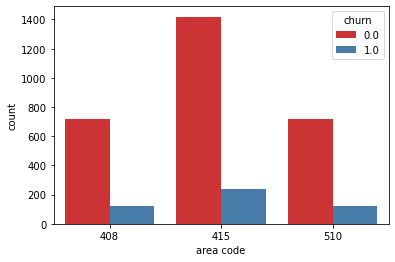

In [18]:
sns.countplot(x='area code', hue='churn', data=df, palette = "Set1");

All three of the are codes seen above are from the San Francisco Bay Area - this does not match with our state values (see above). We can drop area code because it does not seem to lineup with the rest of the data.

**Acount Length**

Mean Account Length for Not Churn    : 3.36
Std Dev Account Length for Not Churn : 1.33
Mean Account Length for Churn        : 3.42
Std Dev Account Length for Churn     : 1.32


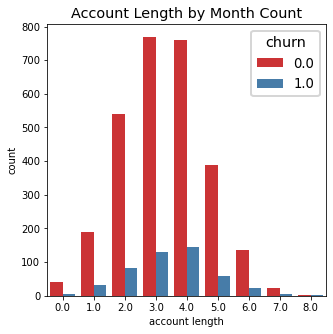

In [19]:
# change from day to month. 
Account_Lgth_Month = round(df['account length']/30)
# plot churn vs. not churn based on account length by month
plt.subplots(figsize = (5, 5))
sns.set_context('poster', font_scale = 0.6)
plt.title('Account Length by Month Count')
sns.countplot(x = Account_Lgth_Month, hue = 'churn', data = df, palette = 'Set1')

print('Mean Account Length for Not Churn    :', round((df[df['churn']==0]['account length']/30).mean(),2))
print('Std Dev Account Length for Not Churn :', round((df[df['churn']==0]['account length']/30).std(),2))
print('Mean Account Length for Churn        :', round((df[df['churn']==1]['account length']/30).mean(),2))
print('Std Dev Account Length for Churn     :', round((df[df['churn']==1]['account length']/30).std(),2))

Both our mean and standard deviations are very similar so this doesn't have an effect on churn rate and can be dropped. 

**States**

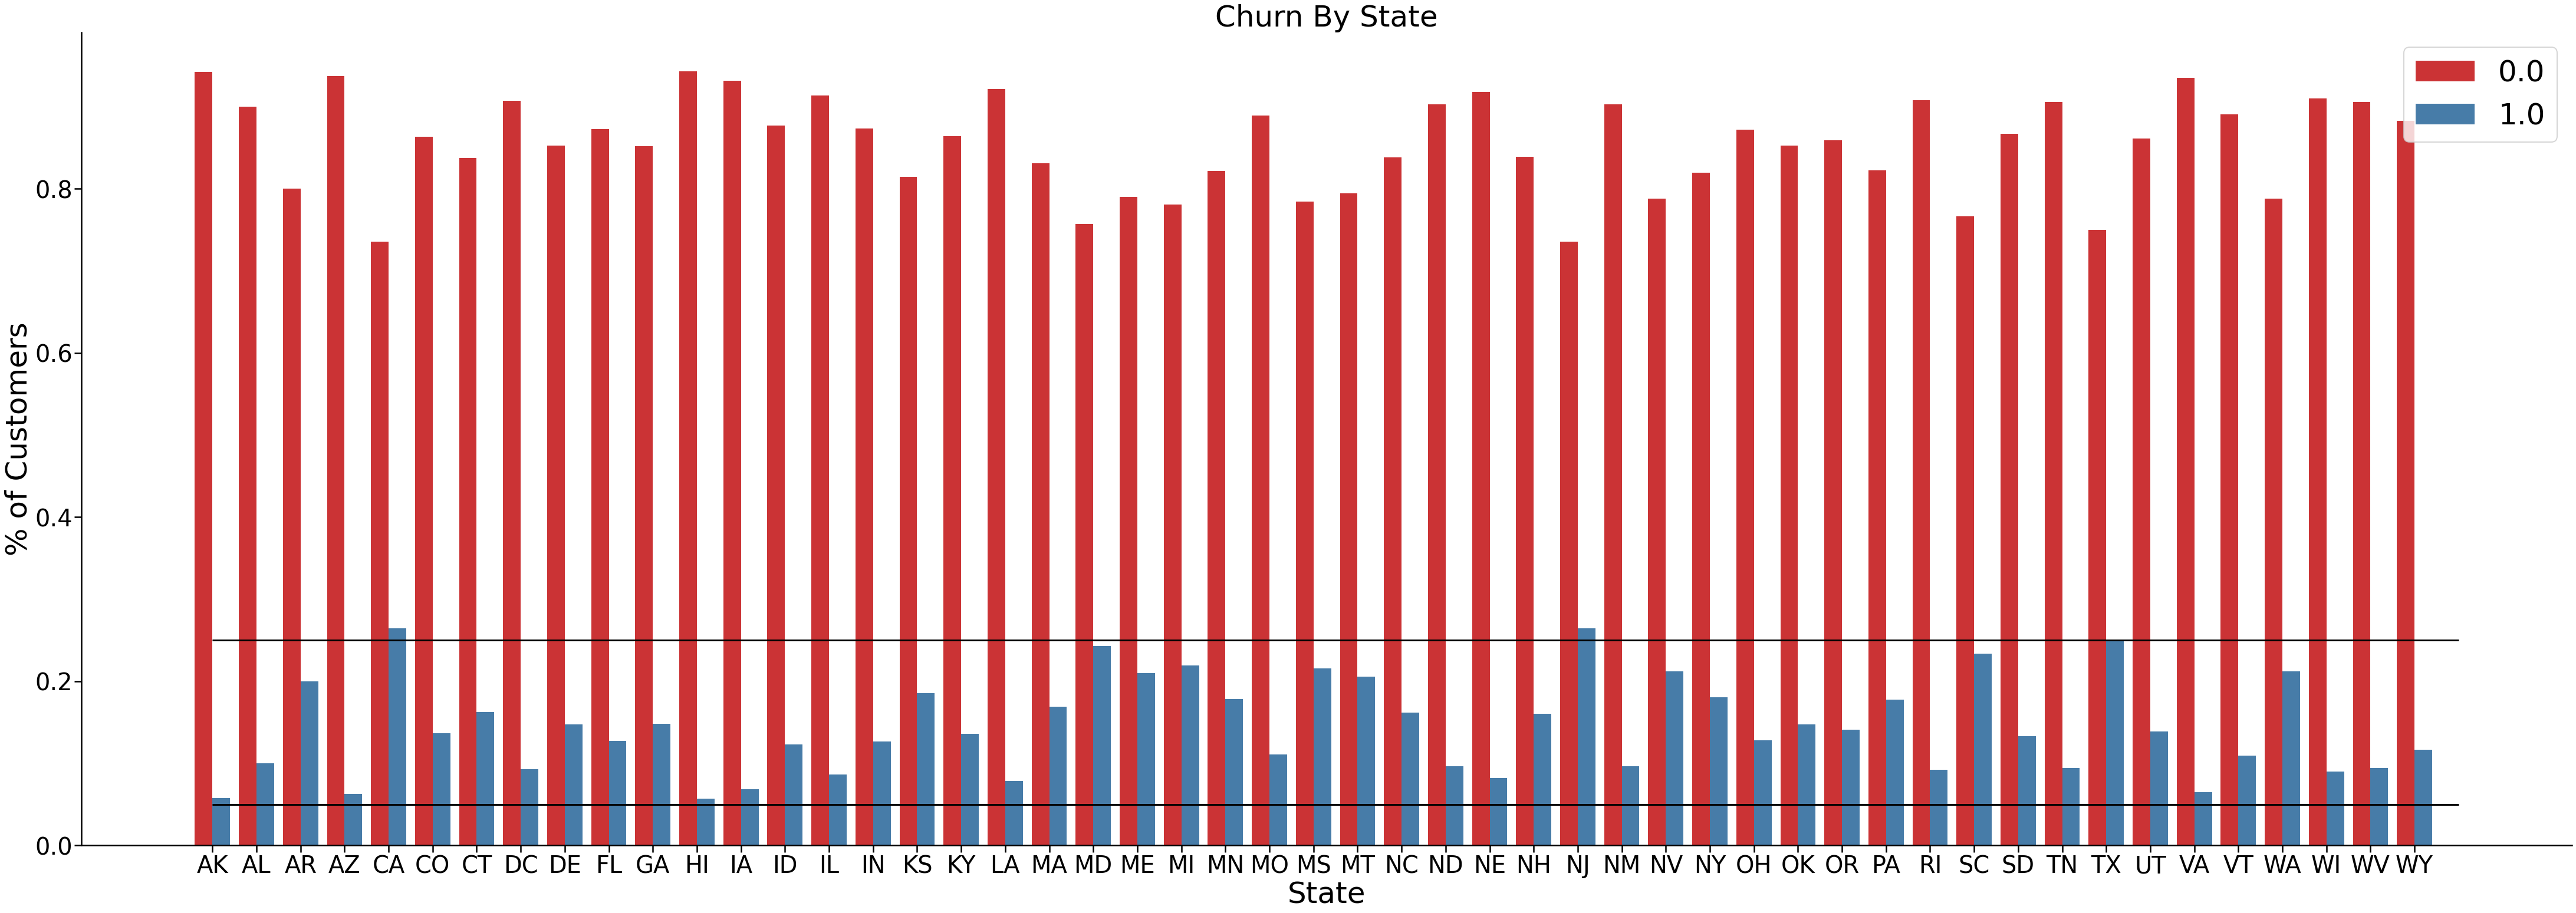

In [20]:
# churn rates group by states
State_Churn = df.groupby('state')['churn'].value_counts(normalize=True)
State_Churn = pd.DataFrame(State_Churn)
State_Churn.columns = ['Value']
State_Churn = State_Churn.reset_index()


sns.set_context('poster', font_scale = 0.6)
g = sns.catplot(data = State_Churn, kind = 'bar', x = 'state', y = 'Value', 
            hue = 'churn', palette = 'Set1', alpha=1, height=20, aspect=3)
plt.title('Churn By State', fontsize = 50)
plt.ylabel('% of Customers', fontsize = 50)
plt.xlabel('State', fontsize = 50)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40) 
plt.legend(fontsize = 50)
g._legend.remove()
plt.hlines(y = 0.25, xmin=0, xmax=51, color='black')
plt.hlines(y = 0.05, xmin=0, xmax=51, color='black');

California, Maryland, New Jersey, and Texas have the highest churn rates. Alaska & Hawaii had the lowest churn rate. But there isn't a clear reason why certain states perform better than others, so we can drop this and work with regions instead. 

**International Plan**

The # of customers with international plan: 323
The # of customers with no international plan: 3010


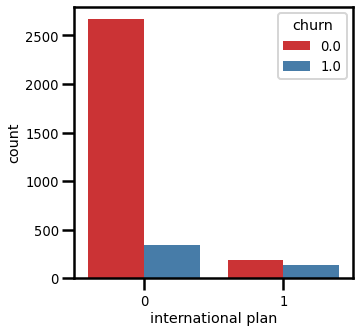

In [21]:
# number of customer with and without international plans
intl_plan = df[df['international plan'] == 1]
print('The # of customers with international plan:', len(intl_plan))
no_intl_plan = df[df['international plan'] == 0]
print('The # of customers with no international plan:', len(no_intl_plan))
sns.set_context('poster', font_scale = 0.6)
plt.subplots(figsize = (5, 5))
sns.countplot(x = 'international plan', hue = 'churn', data = df, palette = 'Set1');

In [22]:
# churn rates by international plan
Churn_By_Intl_Plan = df.groupby('international plan')['churn'].value_counts(normalize=True)
Churn_By_Intl_Plan = pd.DataFrame(Churn_By_Intl_Plan)
Churn_By_Intl_Plan.columns = ['value']
Churn_By_Intl_Plan = Churn_By_Intl_Plan.reset_index()
Churn_By_Intl_Plan

,international plan,churn,value
0,0,0.0,0.885050
1,0,1.0,0.114950
2,1,0.0,0.575851
3,1,1.0,0.424149


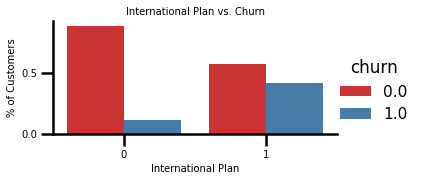

In [23]:
sns.set_context('poster', font_scale = 0.7)
sns.catplot(data = Churn_By_Intl_Plan, kind = 'bar', x = 'international plan', y = 'value', hue = 'churn', 
            palette = 'Set1', alpha=1, height=2.5, aspect=2)
plt.title('International Plan vs. Churn', fontsize = 10)
plt.ylabel('% of Customers', fontsize = 10)
plt.xlabel('International Plan', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10) 
plt.show()

From the visualizations above we can see that churn rates are higher for people who have international plans. This can suggest that rates maybe too high for international plans or that customers who have international plans are more sensitive to price and competition.

**Customer Service Calls**

In [24]:
# get # of customer service calls
Customer_Service = df.groupby('customer service calls')['churn'].agg(['count'])
Customer_Service

,count
customer service calls,
0,697
1,1181
2,759
3,429
4,166
5,66
6,22
7,9
8,2


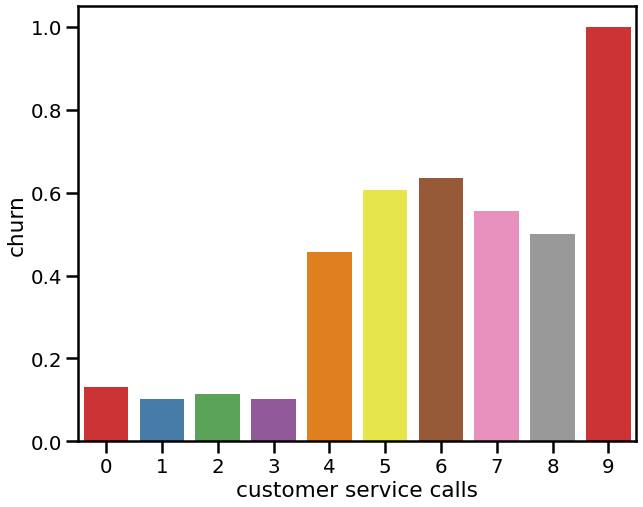

In [25]:
sns.set_context('poster', font_scale = 0.9)
plt.figure(figsize=(10, 8))
sns.barplot(x='customer service calls', y='churn', data=df, palette='Set1', ci=None);

It seems like the greater the number of customer service calls there are the greater likelihood of churn. It looks like once people hit 3 calls, thats when there was a significant rise of customer churn. So 3 calls could be considered as a warning thresold for the company. We will definitely use this column in modeling as there seems to be a distinct relationship.

**Voicemail Plans**

# of customers with voicemail plan: 922
# of customers with no voicemail plan: 2411


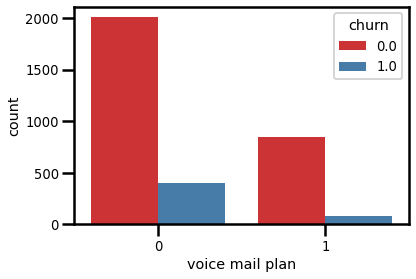

In [26]:
# with vs without voicemail plans customers
voicemail_plan = df[df['voice mail plan'] == 1]
print('# of customers with voicemail plan:', len(voicemail_plan))
no_voicemail_plan = df[df['voice mail plan'] == 0]
print('# of customers with no voicemail plan:', len(no_voicemail_plan))
sns.set_context('poster', font_scale = 0.6)
sns.countplot(x = 'voice mail plan', hue = 'churn', data = df, palette = 'Set1');

In [27]:
# churn rates by voicemail plan
Churn_By_Voicemail_Plan = df.groupby('voice mail plan')['churn'].value_counts(normalize=True)
Churn_By_Voicemail_Plan = pd.DataFrame(Churn_By_Voicemail_Plan)
Churn_By_Voicemail_Plan.columns = ['value']
Churn_By_Voicemail_Plan = Churn_By_Voicemail_Plan.reset_index()
Churn_By_Voicemail_Plan 

,voice mail plan,churn,value
0,0,0.0,0.832849
1,0,1.0,0.167151
2,1,0.0,0.913232
3,1,1.0,0.086768


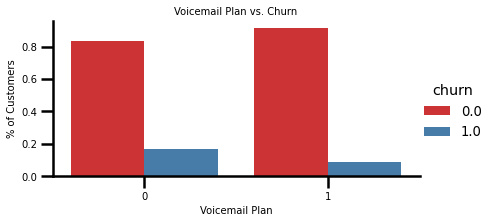

In [28]:
sns.set_context('poster', font_scale = 0.6)
sns.catplot(data = Churn_By_Voicemail_Plan, kind = 'bar', x = 'voice mail plan', y = 'value', 
            hue = 'churn', palette = 'Set1', alpha=1, height=3, aspect=2)
plt.title('Voicemail Plan vs. Churn', fontsize = 10)
plt.ylabel('% of Customers', fontsize = 10)
plt.xlabel('Voicemail Plan', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10) 
plt.show()

The percentage of customers who churned with voicemail plans is larger than those who churned without voicemail plans. This is definitely a useful column to use in our modeling.

In [29]:
# churn rates by number of voicemail messages
Churn_Vo_Qty = df.groupby('number vmail messages')['churn'].value_counts(normalize=True)
Churn_Vo_Qty = pd.DataFrame(Churn_Vo_Qty)
Churn_Vo_Qty.columns = ['value']
Churn_Vo_Qty = Churn_Vo_Qty.reset_index()

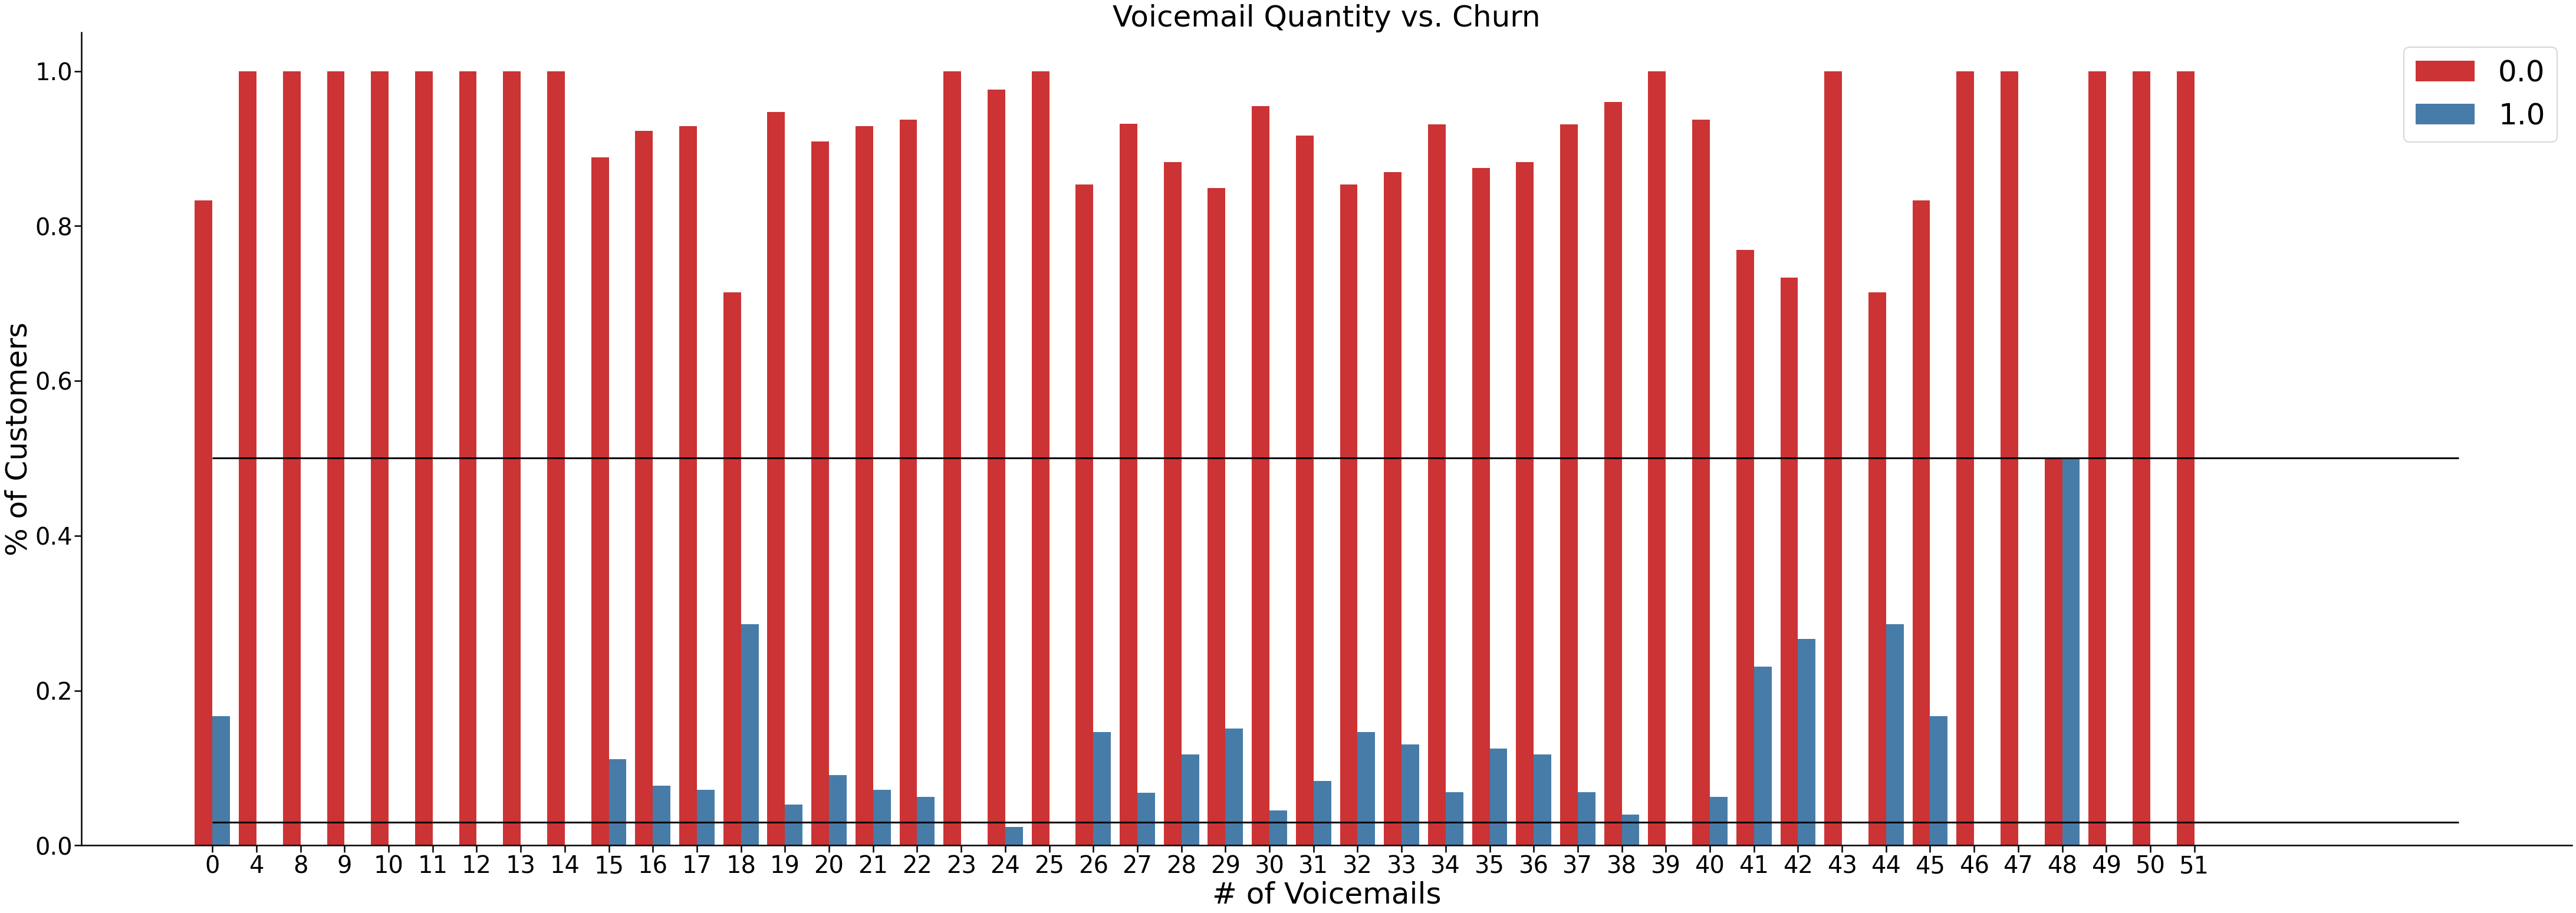

In [30]:
#do categorical plot
sns.set_context('poster', font_scale = 0.6)
g = sns.catplot(data = Churn_Vo_Qty, kind = 'bar', x = 'number vmail messages', y = 'value', 
            hue = 'churn', palette = 'Set1', alpha=1, height=20, aspect=3)
plt.title('Voicemail Quantity vs. Churn', fontsize = 50)
plt.ylabel('% of Customers', fontsize = 50)
plt.xlabel('# of Voicemails', fontsize = 50)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40) 
plt.legend(fontsize = 50)
g._legend.remove()
plt.hlines(y = 0.50, xmin=0, xmax=51, color='black')
plt.hlines(y = 0.03, xmin=0, xmax=51, color='black')

Customers who got more voicemail messages tended to churn more then customers who got less, however, this relationship is not perfectly defined. 

**Call Totals**

In [31]:
TCalls = df[['total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'total calls','churn']]
TCalls.head()

,total day calls,total eve calls,total night calls,total intl calls,total calls,churn
0,110,99,91,3,303,0.0
1,123,103,103,3,332,0.0
2,114,110,104,5,333,0.0
3,71,88,89,7,255,0.0
4,113,122,121,3,359,0.0


In [32]:
#get sum of churn (y or n) for each type of call
TCalls_Churn = TCalls.groupby('churn').sum().reset_index()
TCalls_Churn


,churn,total day calls,total eve calls,total night calls,total intl calls,total calls
0,0.0,285807,285110,285166,12919,869002
1,1.0,48945,48571,48493,2011,148020


In [33]:
r = TCalls_Churn['churn']
# Turn call values to percentages
Totals = TCalls_Churn['total calls']
Day = TCalls_Churn['total day calls'] / Totals
Eve = TCalls_Churn['total eve calls'] / Totals
Night = TCalls_Churn['total night calls'] / Totals
Intl = TCalls_Churn['total intl calls'] / Totals

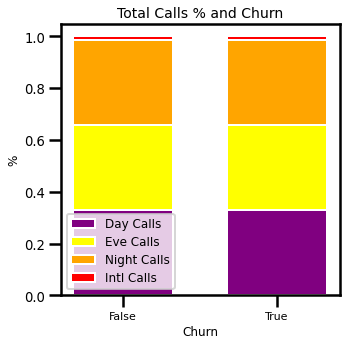

In [34]:
plt.figure(figsize=(5,5))
names = ('False', 'True')
barWidth = 0.65

# Day calls
plt.bar(r, Day, color='purple', edgecolor='white',
        width=barWidth, label='Day Calls')

# Eve calls
plt.bar(r, Eve, bottom=Day, color='yellow',
        edgecolor='white', width=barWidth, label='Eve Calls')

# Night calls
plt.bar(r, Night, bottom=[i+j for i,j in zip(Day, Eve)],
        color='orange', edgecolor='white', width=barWidth, label='Night Calls')

# Intl Calls
plt.bar(r, Intl, bottom=[i+j+k for i,j,k in zip(Day, Eve, Night)],
        color='red', edgecolor='white', width=barWidth, label='Intl Calls')

plt.xticks(r, names, fontsize=11)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('%', fontsize=12)
plt.title('Total Calls % and Churn', fontsize=14)
plt.legend(fontsize='small')
plt.show()

The timing of calls and their international vs domestic nature has almost no effect on churn rates. These columns may not be very useful in our decision making or modeling. 

**Rates**

In [35]:
# rate/min by timing of day
Day_Rt = (df['total day charge'] / df['total day minutes']).median()
Eve_Rt = (df['total eve charge'] / df['total eve minutes']).median()
Night_Rt = (df['total night charge'] / df['total night minutes']).median()
Intl_Rt = (df['total intl charge'] / df['total intl minutes']).median()
print("Day Rate:", Day_Rt)
print("Eve Rate:", Eve_Rt)
print("Night Rate:", Night_Rt)
print("International Rate:", Intl_Rt)

Day Rate: 0.17000415454923143
Eve Rate: 0.085
Night Rate: 0.045
International Rate: 0.27


In [36]:
# calculate rates of making one international call, with and without international plan
Intl_Plan = df[df['international plan'] == 1]
No_Intl_Plan = df[df['international plan'] == 0]
Intl_Plan_Rate = (Intl_Plan['total intl charge'] / Intl_Plan['total intl minutes']).median()
Non_Intl_Plan_Rate = (No_Intl_Plan['total intl charge'] / No_Intl_Plan['total intl minutes']).median()
print("Int'l Plan Rate:", Intl_Plan_Rate)
print("No Int'l Plan Rate: ", Non_Intl_Plan_Rate)

Int'l Plan Rate: 0.27
No Int'l Plan Rate:  0.27


The average rate per minute for calls is the exact same regardless of having an international plan or not having an international plan. Unfortunately the lack of difference suggests this metric may not be very useful in modeling. 

**Correlation Mapping**

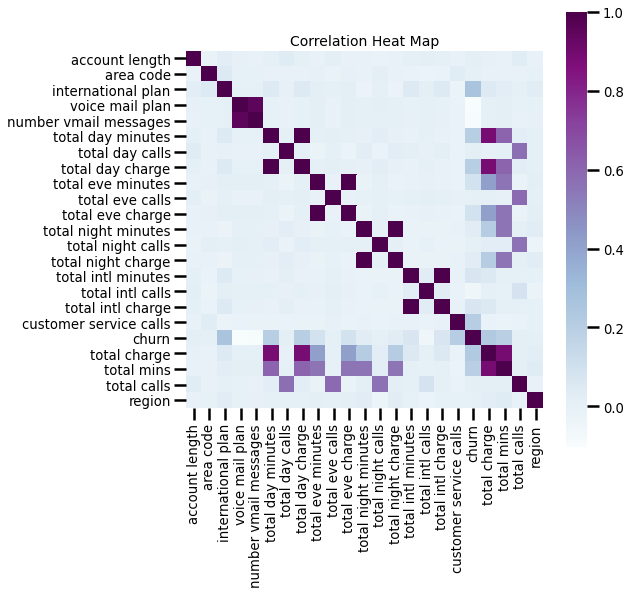

In [37]:
#make a correlation map
chucorr = df.corr()
plt.subplots(figsize=(8, 8))

sns.heatmap(chucorr, square=True, cmap="BuPu")
plt.title("Correlation Heat Map", fontsize=14)
plt.show()

Below are the columns that we have choosen to drop for our logistic regression and k nearest neighbor models. However, they do not seem to negatively effect our decision tree models ability to classify and predict. So we will drop them after the decision tree modeling is done.

In [38]:
#df = df.drop(['area code','phone number', 'total charge', 'total calls', 'total mins', 'total day charge','total eve charge', 'total night charge', 'total intl charge', 'state'], axis =1)



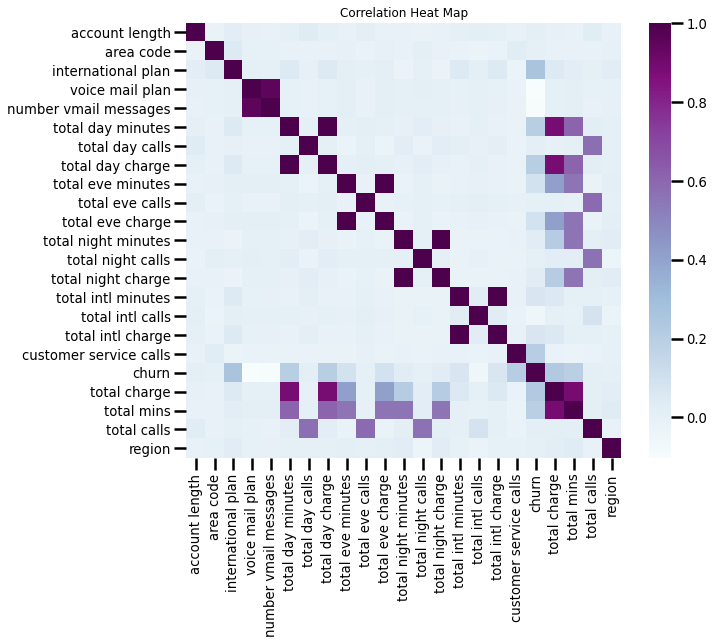

In [39]:
#correlation map after dropping the less correlated columns
chucorr = df.corr()
plt.subplots(figsize=(10, 8))

sns.heatmap(chucorr, square=True, cmap="BuPu")
plt.title("Correlation Heat Map", fontsize=12)
plt.show()

## Modeling ##

Below we split X (factors) from y (target)

In [40]:
y = df['churn']
X = df.drop(['churn', 'state', 'phone number'], axis=1)

**Decision Trees Model 1**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state= 420)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


DTmodel = DecisionTreeClassifier(random_state=420)

DTmodel.fit(X_train_scaled, y_train)


model_predictions(DTmodel, X_train_scaled, X_test_scaled, y_train, y_test)


Training Precision:  1.0
Testing Precision:  0.7978723404255319
-----
Training Recall:  1.0
Testing Recall:  0.8241758241758241
-----
Training Accuracy:  1.0
Testing Accuracy:  0.9475262368815592
-----
Training F1-Score:  1.0
Testing F1-Score:  0.8108108108108109


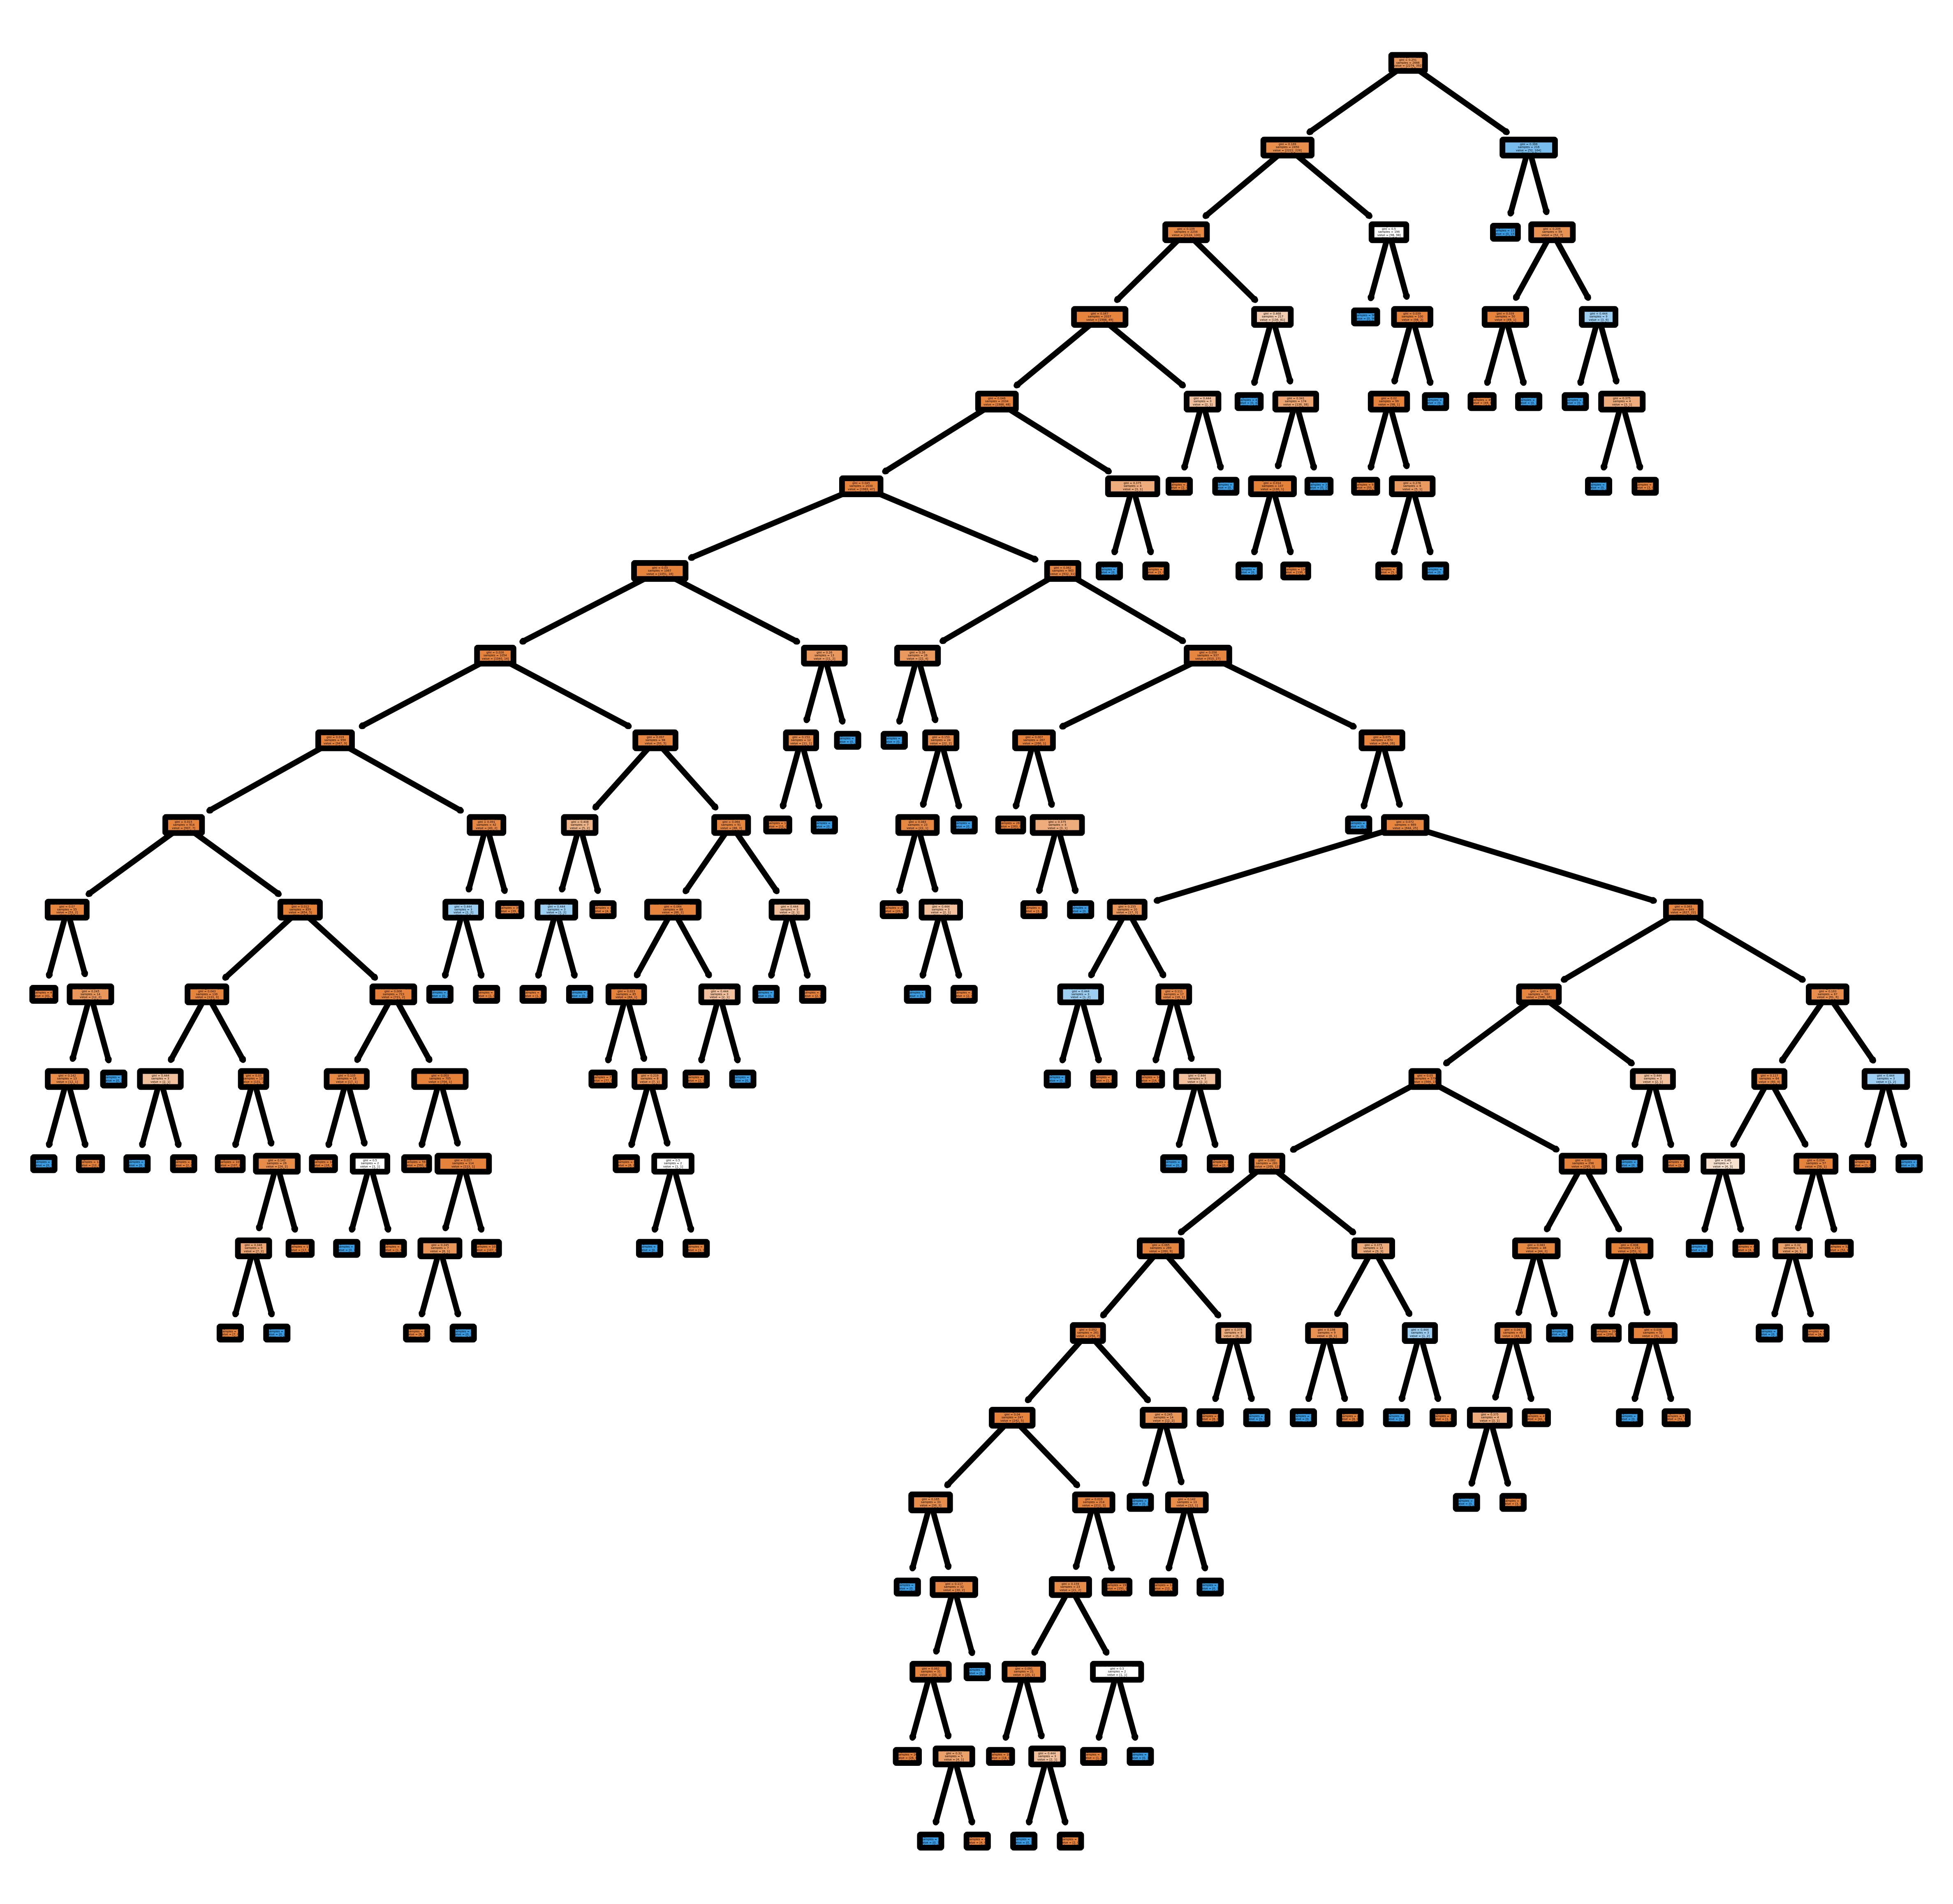

In [42]:
plt.figure(figsize=(12,12), dpi=500, edgecolor='black')

tree.plot_tree(DTmodel, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

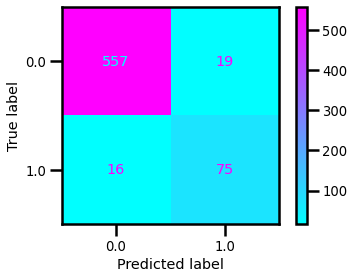

In [43]:
confusion_matrix(DTmodel, X_test_scaled, y_test)

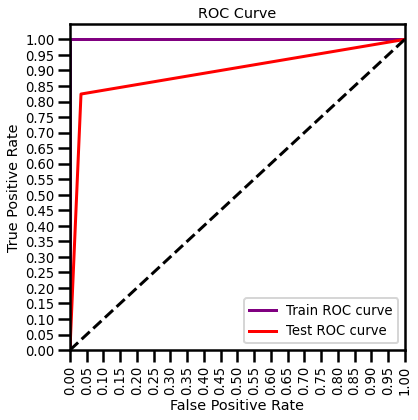

Train AUC: 1.0
Test AUC: 0.8955948565323565


In [44]:
plot_roc_proba(DTmodel, X_train_scaled, X_test_scaled, y_train, y_test)

**Decision Trees Model 2**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state= 420)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


DTmodel2 = DecisionTreeClassifier(criterion = 'entropy', random_state=420)

DTmodel2.fit(X_train_scaled, y_train)


model_predictions(DTmodel2, X_train_scaled, X_test_scaled, y_train, y_test)

Training Precision:  1.0
Testing Precision:  0.8
-----
Training Recall:  1.0
Testing Recall:  0.8351648351648352
-----
Training Accuracy:  1.0
Testing Accuracy:  0.9490254872563718
-----
Training F1-Score:  1.0
Testing F1-Score:  0.8172043010752689


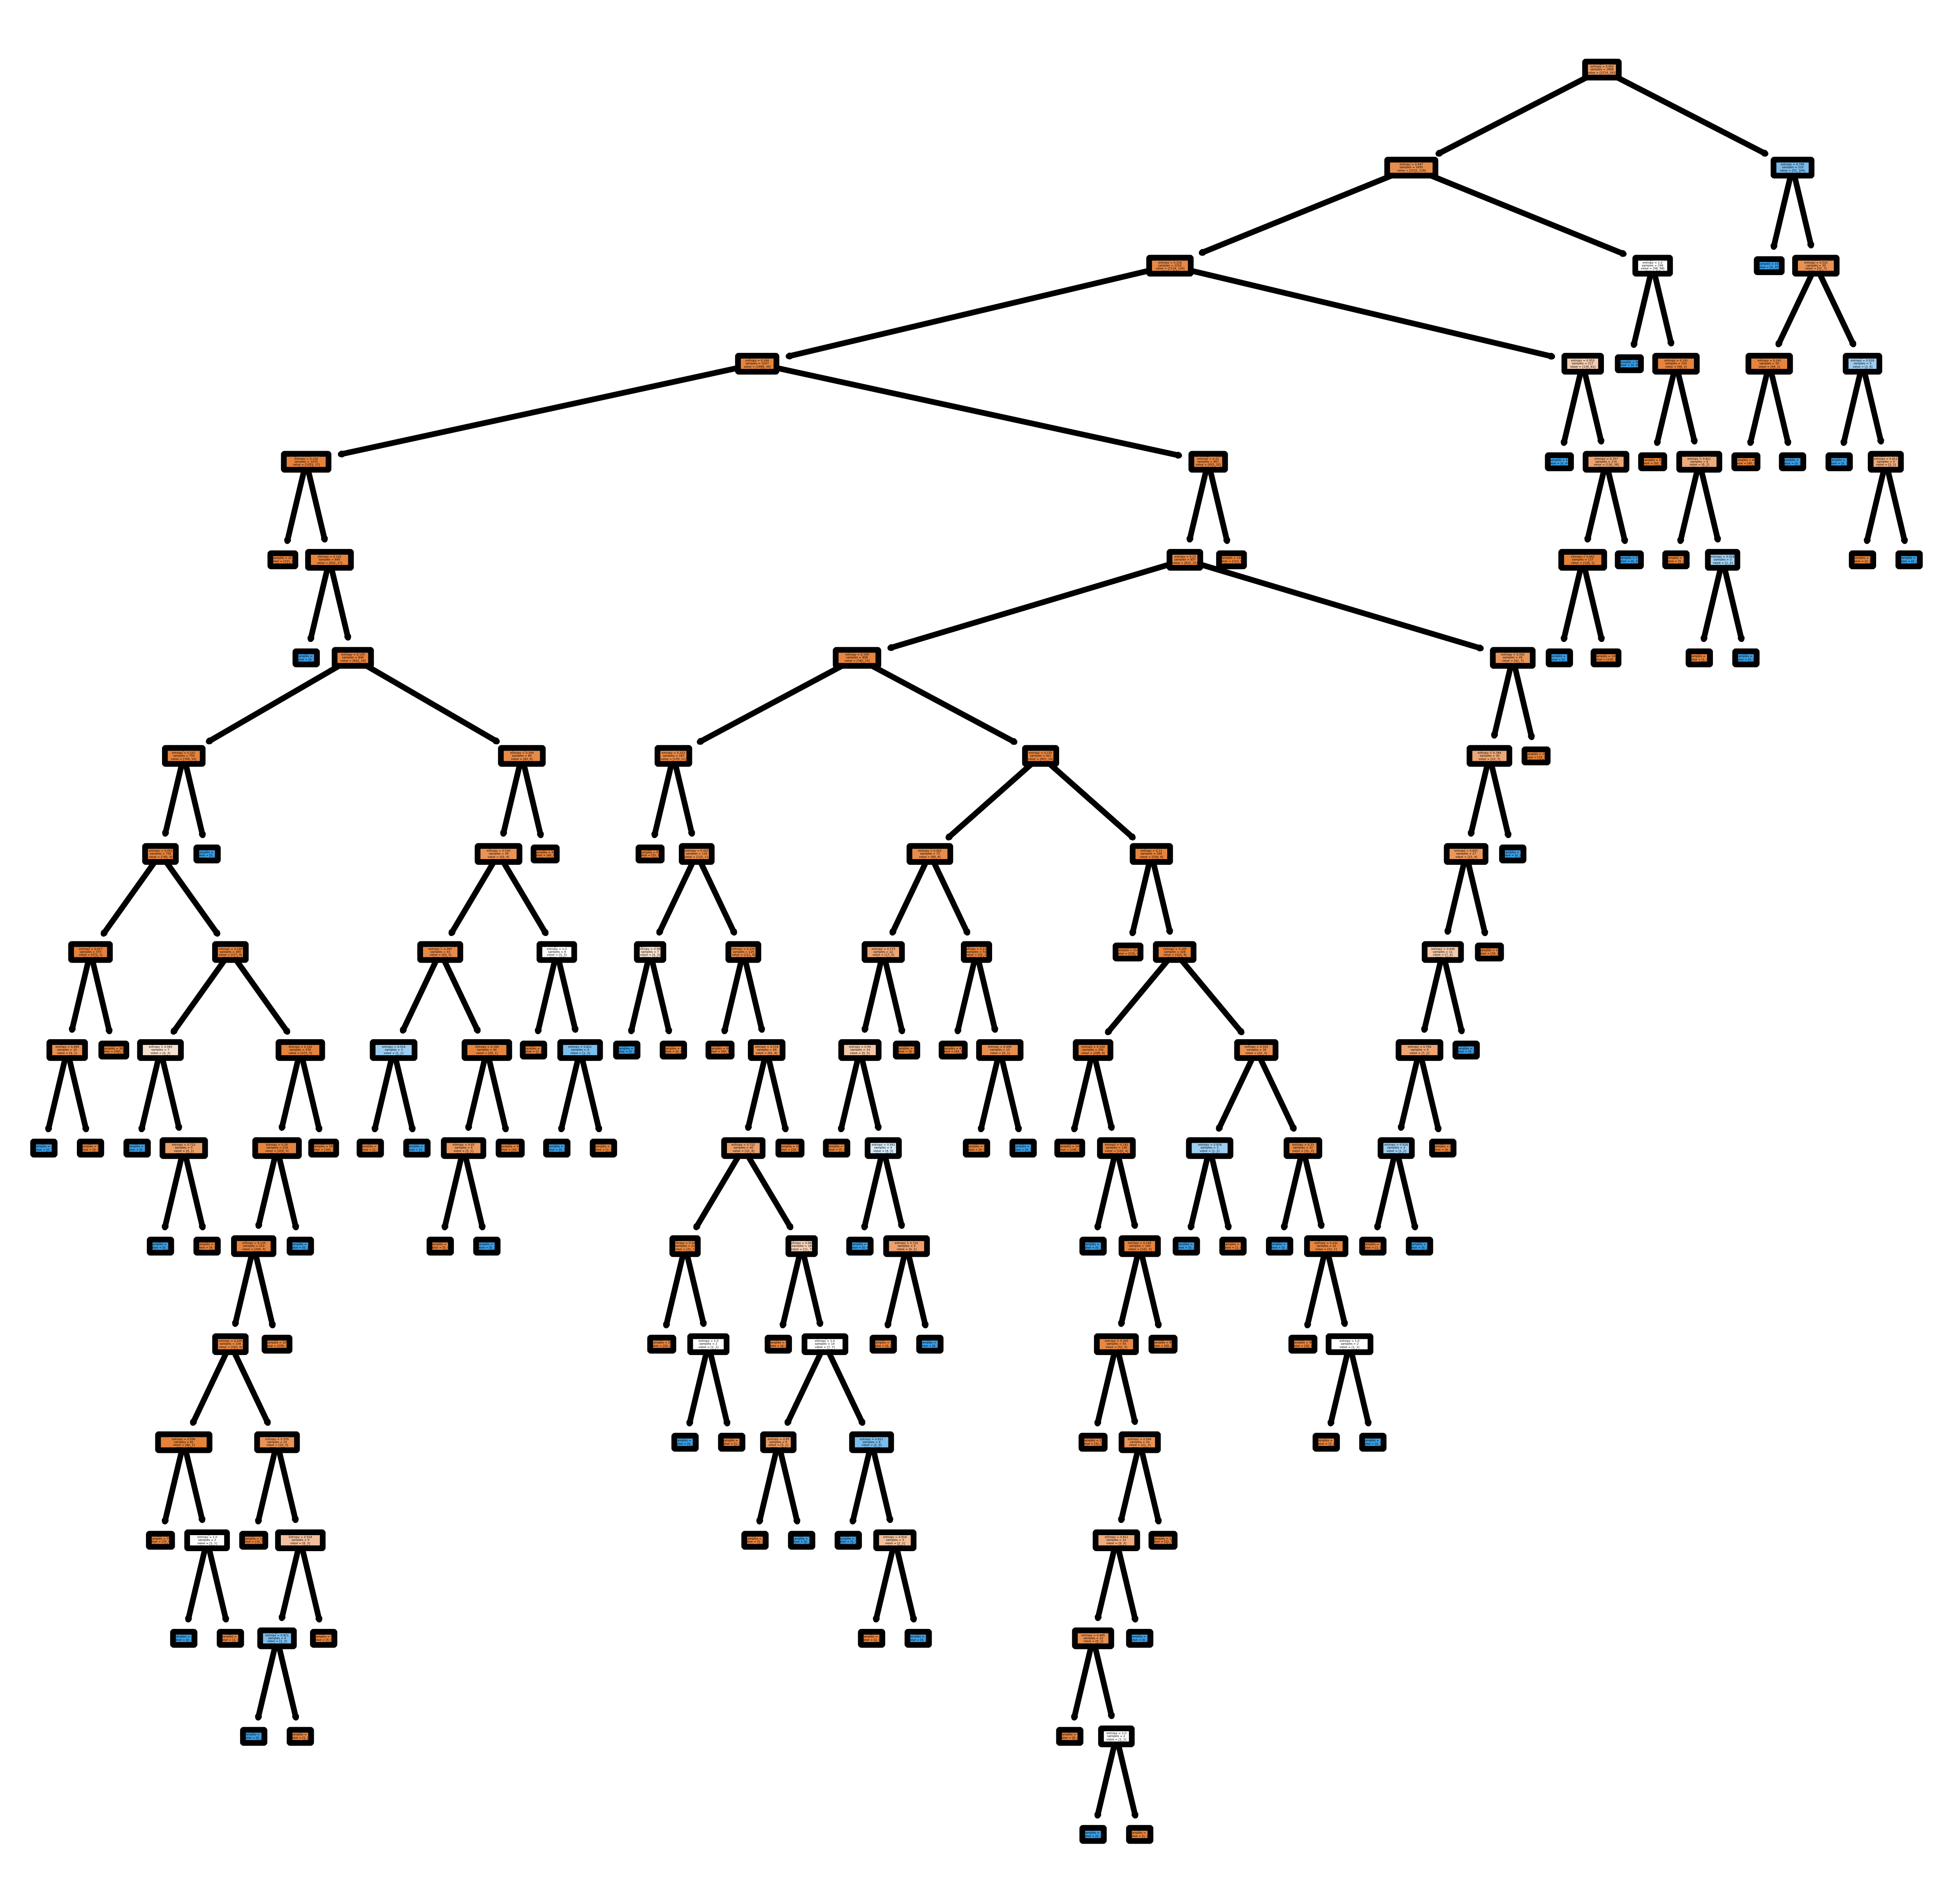

In [46]:
plt.figure(figsize=(12,12), dpi=500, edgecolor='black')

tree.plot_tree(DTmodel2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

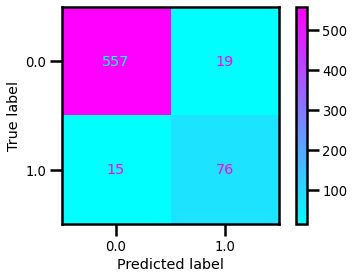

In [47]:
confusion_matrix(DTmodel2, X_test_scaled, y_test)

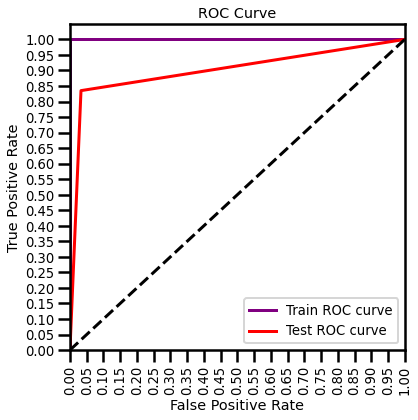

Train AUC: 1.0
Test AUC: 0.901089362026862


In [48]:
plot_roc_proba(DTmodel2, X_train_scaled, X_test_scaled, y_train, y_test)

Analysis - changing between GINI and Entropy as the split criterion for our DT model does not really change much. Recall goes down while all the other metrics go up slightly. Test AUC using Entropy as criterion goes down as compared to Test AUC using GINI as criterion. We should try to do grid search to find the best parameters for our DT model. 

**Model Tuning**

There seems to be two major things we need to deal with - class imbalance and then finding the best parameters to use for our DT model.


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state= 420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initiate sampling class
smote1 = SMOTE(sampling_strategy='minority', random_state=420)
# Fit and apply the transform
X_train_over, y_train_over = smote1.fit_resample(X_train_scaled, y_train)
# Summarize class distribution
print(Counter(y_train_over))

DTmodel3 = DecisionTreeClassifier(random_state=420)                       

DTmodel3.fit(X_train_over, y_train_over)

Counter({0.0: 2274, 1.0: 2274})


DecisionTreeClassifier(random_state=420)

In [50]:
model_predictions(DTmodel3, X_train_over, X_test_scaled, y_train_over, y_test)

Training Precision:  1.0
Testing Precision:  0.7378640776699029
-----
Training Recall:  1.0
Testing Recall:  0.8351648351648352
-----
Training Accuracy:  1.0
Testing Accuracy:  0.9370314842578711
-----
Training F1-Score:  1.0
Testing F1-Score:  0.7835051546391752


Surprisingly enough ... SMOTE is causing out test metrics across the board to go down - with precision taking the biggest hit. Lets try doing oversampling instead

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initiate sampling class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=420)
# Fit and apply the transform
X_train_over2, y_train_over2 = oversample.fit_resample(X_train_scaled, y_train)
# Summarize class distribution
print(Counter(y_train_over))

DTmodel4 = DecisionTreeClassifier(random_state=420)                       

DTmodel4.fit(X_train_over, y_train_over)

Counter({0.0: 2274, 1.0: 2274})


DecisionTreeClassifier(random_state=420)

In [52]:
model_predictions(DTmodel4, X_train_over2, X_test_scaled, y_train_over2, y_test)

Training Precision:  1.0
Testing Precision:  0.8351648351648352
-----
Training Recall:  1.0
Testing Recall:  0.8351648351648352
-----
Training Accuracy:  1.0
Testing Accuracy:  0.9550224887556222
-----
Training F1-Score:  1.0
Testing F1-Score:  0.8351648351648353


Oversampling works much better for this dataset than SMOTE. Meanwhile undersampling would not be viable for this dataset because it only contains 3500 rows!

**Gridsearch**

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

DTmodel_GS = DecisionTreeClassifier(random_state=420)

DT_grid = {
           'class_weight': ['None', 'balanced'],
           'criterion': ['gini', 'entropy'],
           'max_depth': [2, 3, 4, 5, 6, 7, 8],
           'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
           'min_samples_split': [2, 5, 10, 20],
           'random_state': [420]
          }

DT_GS = GridSearchCV(estimator = DTmodel_GS, 
                             param_grid = DT_grid, 
                             cv=5, 
                             return_train_score=True)

DT_GS.fit(X_train_scaled, y_train)

print('Best parameters for Our Decision Tree Model:')
DT_GS.best_params_

Best parameters for Our Decision Tree Model:


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 420}

Based off of the Gridsearch we can say that our best parameters for our DT model would be balanced class weight, entropy as a criterion, max depth of 5, min samples per leaf of 1, and a min samples per split of 2. We will use this to build our FinalDT.

**FinalDT**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initiate sampling class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=420)
# Fit and apply the transform
X_train_over2, y_train_over2 = oversample.fit_resample(X_train_scaled, y_train)
# Summarize class distribution
print(Counter(y_train_over2))

FinalDT = DecisionTreeClassifier(class_weight = 'balanced',
 criterion = 'entropy',
 max_depth = 5,
 min_samples_leaf =1,
 min_samples_split = 2, random_state=420)                       

FinalDT.fit(X_train_over2, y_train_over2)

model_predictions(FinalDT, X_train_over2, X_test_scaled, y_train_over2, y_test)

Counter({0.0: 2274, 1.0: 2274})
Training Precision:  0.998992950654582
Testing Precision:  0.95
-----
Training Recall:  0.872471416007036
Testing Recall:  0.8351648351648352
-----
Training Accuracy:  0.9357959542656112
Testing Accuracy:  0.9715142428785607
-----
Training F1-Score:  0.9314553990610329
Testing F1-Score:  0.888888888888889


This seems to have taken care of our overfitting issues and performs well according to all metrics. 

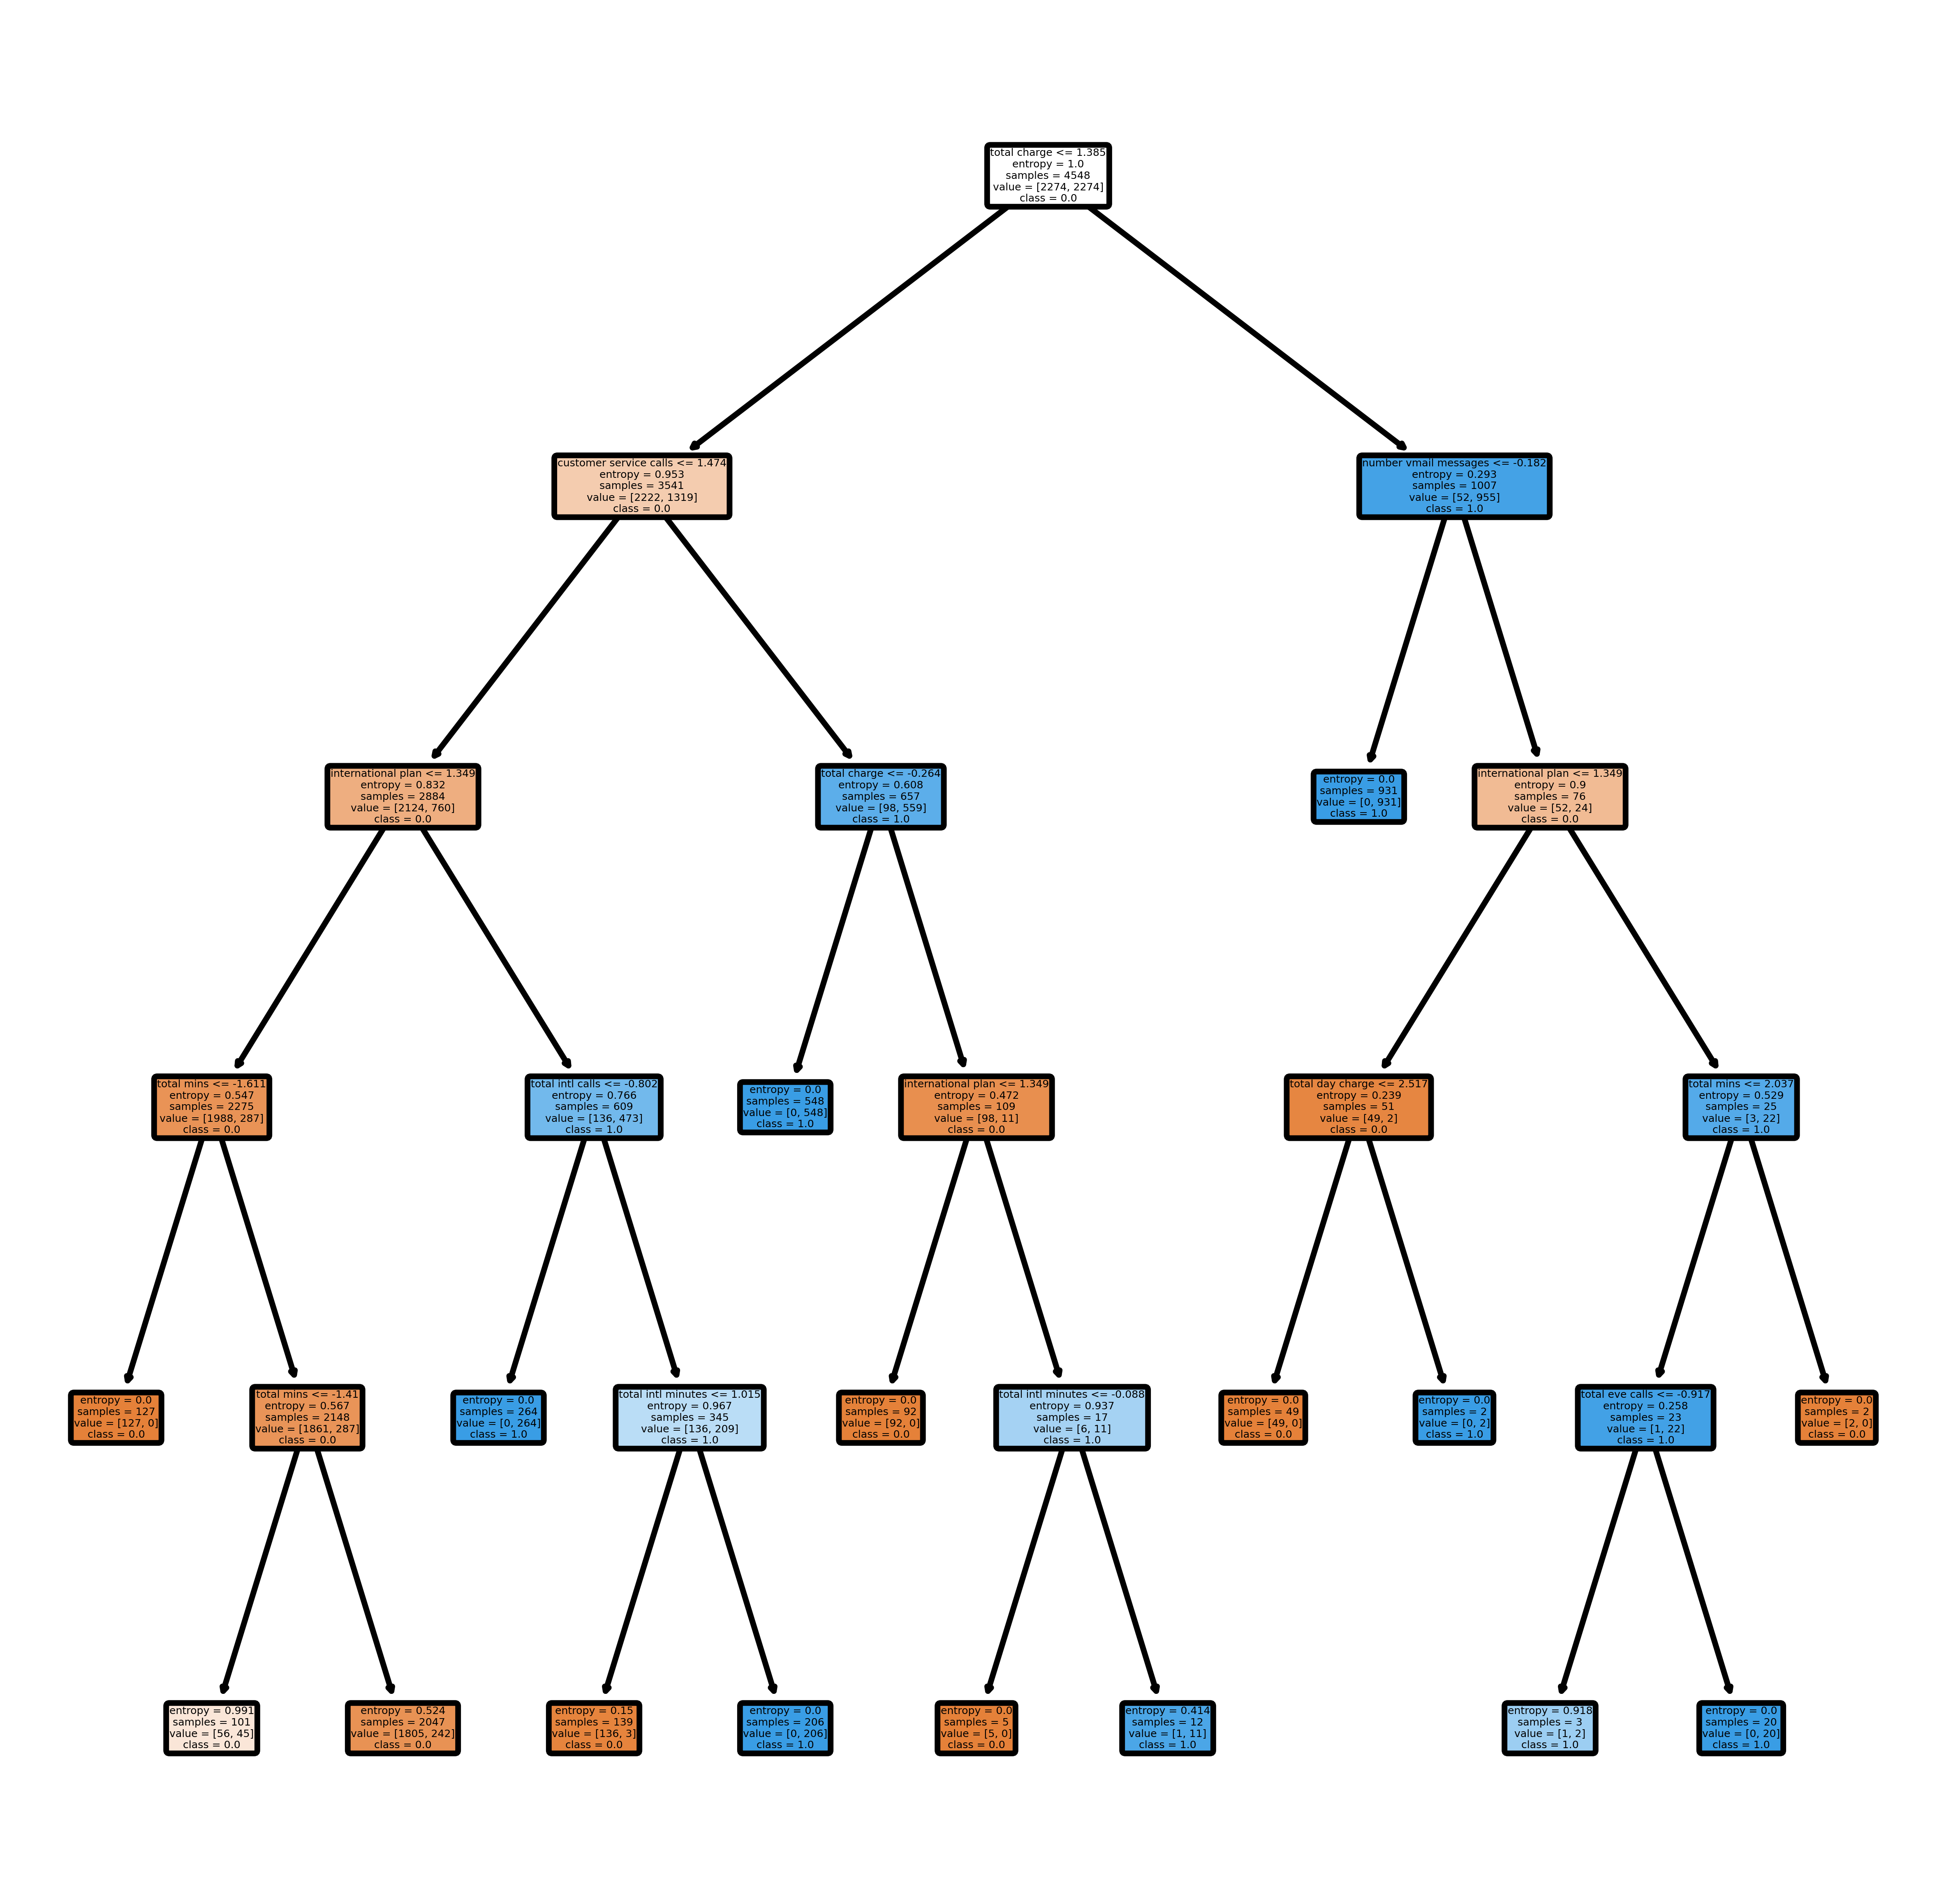

In [55]:
plt.figure(figsize=(12,12), dpi=500, edgecolor='black')

tree.plot_tree(FinalDT, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

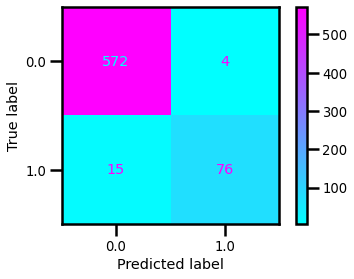

In [56]:
confusion_matrix(FinalDT, X_test_scaled, y_test)

## Logistic Regression ##

In [57]:
df2 = df.drop(['area code','phone number', 'account length', 'total charge', 'total calls', 'total mins', 
          'total day charge','total eve charge', 'total night charge', 'total intl charge', 'state'], axis =1)

In [58]:
x = df2.drop(['churn'], axis =1)
y = df2.churn

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 420)

**Model 1 Unbalanced**

In [60]:
logreg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=False, intercept_scaling=1, 
                            class_weight=None, random_state=420, solver='liblinear', max_iter=100, multi_class='auto', 
                            verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [61]:
model_predictions(logreg, x_train, x_test, y_train, y_test)

Training Precision:  0.5323741007194245
Testing Precision:  0.45714285714285713
-----
Training Recall:  0.18877551020408162
Testing Recall:  0.17582417582417584
-----
Training Accuracy:  0.8563390847711928
Testing Accuracy:  0.8590704647676162
-----
Training F1-Score:  0.2787193973634652
Testing F1-Score:  0.253968253968254


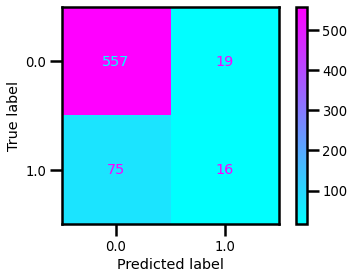

In [62]:
confusion_matrix(logreg, x_test, y_test)

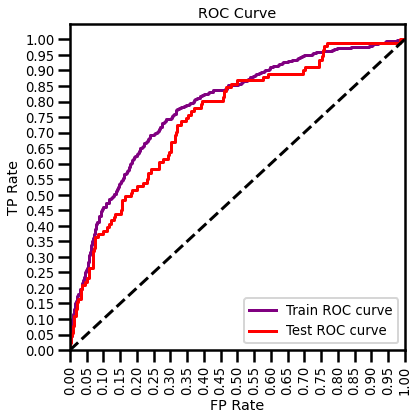

Train AUC: 0.7865332148690611
Test AUC: 0.751717032967033


In [63]:
plot_roc(logreg, x_train, x_test, y_train, y_test)

**Model 2 Balanced**

In [64]:
# Instantiate the model, change class_weight to balanced
logreg_balanced = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=False, intercept_scaling=1, 
                            class_weight='balanced', random_state=420, solver='liblinear', max_iter=100, multi_class='auto', 
                            verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [65]:
model_predictions(logreg_balanced, x_train, x_test, y_train, y_test)

Training Precision:  0.33755760368663595
Testing Precision:  0.29797979797979796
-----
Training Recall:  0.7474489795918368
Testing Recall:  0.6483516483516484
-----
Training Accuracy:  0.7471867966991748
Testing Accuracy:  0.7436281859070465
-----
Training F1-Score:  0.4650793650793651
Testing F1-Score:  0.4083044982698962


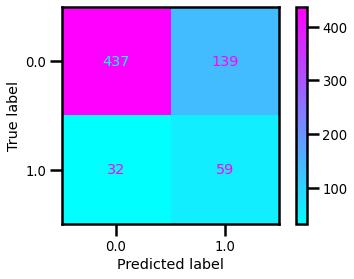

In [66]:
confusion_matrix(logreg_balanced, x_test, y_test)

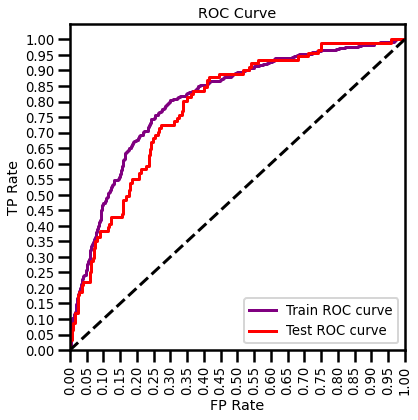

Train AUC: 0.8069234290022076
Test AUC: 0.7829479548229549


In [67]:
plot_roc(logreg_balanced, x_train, x_test, y_train, y_test)

Accurary scores decreased while F1 scores increased. Overall this model performs much worse than the decision tree model. 

## K-Nearest Neighbor ##


In [68]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()

In [69]:
model_predictions(knn, x_train_scaled, x_test_scaled, y_train, y_test)

Training Precision:  0.9045454545454545
Testing Precision:  0.8064516129032258
-----
Training Recall:  0.5076530612244898
Testing Recall:  0.27472527472527475
-----
Training Accuracy:  0.9197299324831207
Testing Accuracy:  0.8920539730134932
-----
Training F1-Score:  0.6503267973856209
Testing F1-Score:  0.40983606557377045


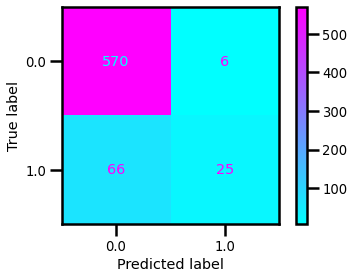

In [70]:
confusion_matrix(knn, x_test_scaled, y_test)

**K Nearest Neighbor Model 2**

In [71]:
def find_best_k(x_train_scaled, y_train, x_test_scaled, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train_scaled, y_train)
        train_score = knn.score(x_train_scaled, y_train)
        test_score = knn.score(x_test_scaled, y_test)
        if test_score > best_score:
            best_k = k
            best_score = test_score
    
    print("Best Value for k: {}".format(best_k))
    
find_best_k(x_train_scaled, y_train, x_test_scaled, y_test)

Best Value for k: 9


In [72]:
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [73]:
model_predictions(knn_3, x_train_scaled, x_test_scaled, y_train, y_test)

Training Precision:  0.9125475285171103
Testing Precision:  0.6744186046511628
-----
Training Recall:  0.6122448979591837
Testing Recall:  0.31868131868131866
-----
Training Accuracy:  0.9343585896474118
Testing Accuracy:  0.8860569715142429
-----
Training F1-Score:  0.732824427480916
Testing F1-Score:  0.43283582089552236


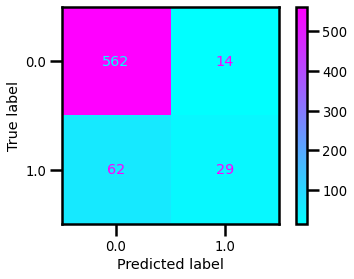

In [74]:
confusion_matrix(knn_3, x_test_scaled, y_test)

From this model we can take away that accuracy scores stayed relatively the same, F1 scores are still pretty low and this model is not extremely overfitted. 

**KNN GridSearch**

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=420)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf_gs = KNeighborsClassifier()

knn_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13],
            'weights':['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan'],
            'n_jobs': [-1]}

knn_gridsearch = GridSearchCV(estimator=knn_clf_gs, 
                              param_grid=knn_grid, 
                              cv=5,
                              return_train_score=True)


# Fit to the data
knn_gridsearch.fit(X_train_scaled, y_train)

# Best parameters for our Decision Tree model:
print('Best parameters for Our KNN Model:')
knn_gridsearch.best_params_

Best parameters for Our KNN Model:


{'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 3, 'weights': 'uniform'}

In [76]:
knn_clf_gs = KNeighborsClassifier(metric='manhattan', 
                                  n_jobs=-1, 
                                  n_neighbors=7, 
                                  weights='uniform')

knn_clf_gs.fit(X_train_scaled, y_train)

print('Train Score:', knn_clf_gs.score(X_train_scaled, y_train))
print('Test Score:', knn_clf_gs.score(X_test_scaled, y_test))

Train Score: 0.904351087771943
Test Score: 0.8935532233883059


Train Score: 0.904351087771943
Test Score: 0.8935532233883059
------------------------------------
Training Precision:  0.9101796407185628
Testing Precision:  0.8125
-----
Training Recall:  0.3877551020408163
Testing Recall:  0.2857142857142857
-----
Training Accuracy:  0.904351087771943
Testing Accuracy:  0.8935532233883059
-----
Training F1-Score:  0.5438282647584973
Testing F1-Score:  0.42276422764227645


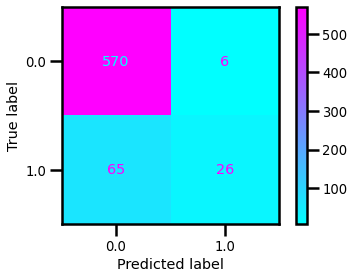

Train AUC: 0.9557823129251701
Test AUC: 0.8337148962148963
------------------------------------


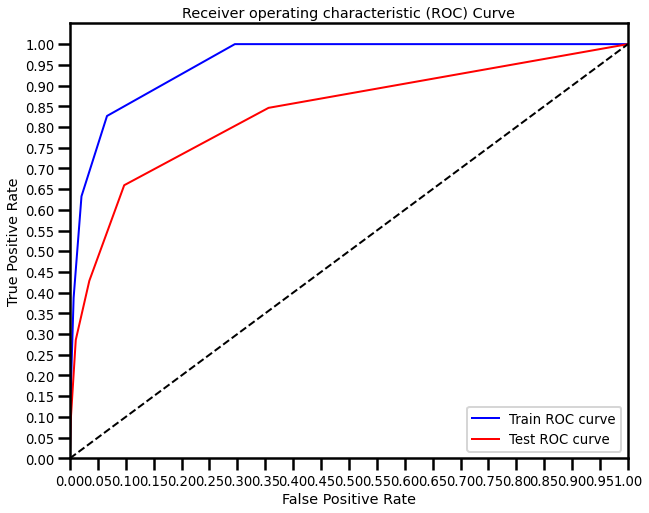

In [77]:
model_control_pp(knn_clf_gs, X_train_scaled, X_test_scaled, y_train, y_test)

After looking at all three models it is obvious the FinalDT model works the best as it has the highest AUC as well as other test metrics - including recall, precision, accuracy, and F1 score. We would use this FinalDT model in our weekly/monthly  workflow with SyriaTel to predict which of the given customers in the data set will churn - if no action is taken. 